In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Indian_Kids_Screen_Time_cleaned (1).csv")


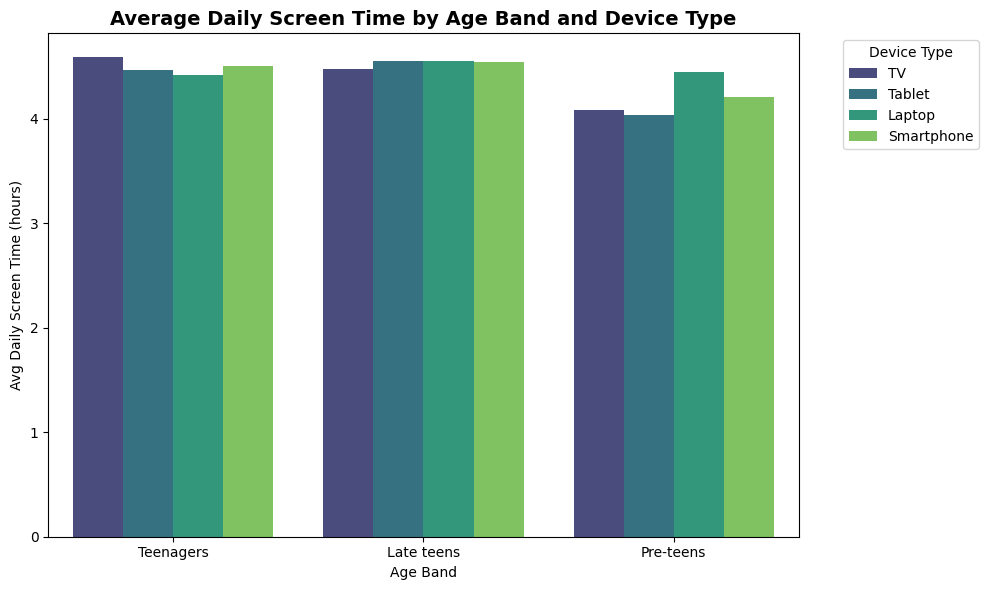

In [5]:
# --- 1. Average Screen Time by Age Band and Device Type ---
habit_age_device = (
    df.groupby(['Age_Band', 'Primary_Device'])['Avg_Daily_Screen_Time_hr']
    .mean()
    .reset_index()
    .sort_values(by='Avg_Daily_Screen_Time_hr', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=habit_age_device, x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Primary_Device', palette='viridis')
plt.title("Average Daily Screen Time by Age Band and Device Type", fontsize=14, weight='bold')
plt.xlabel("Age Band")
plt.ylabel("Avg Daily Screen Time (hours)")
plt.legend(title="Device Type", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

Younger users may have higher screen time on smartphones.

Older users might spend more time on laptops or tablets.

This shows lifestyle-driven usage habits.

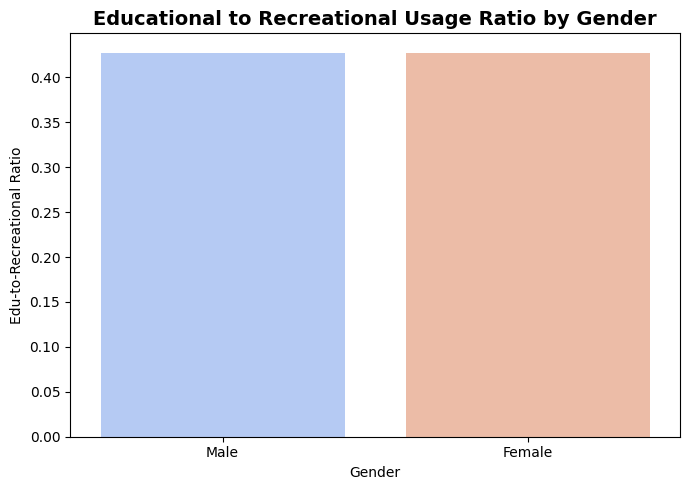

In [6]:
# --- 2. Educational vs Recreational Usage by Gender ---
edu_recreational = (
    df.groupby('Gender')['Educational_to_Recreational_Ratio']
    .mean()
    .reset_index()
    .sort_values(by='Educational_to_Recreational_Ratio', ascending=False)
)

plt.figure(figsize=(7,5))
sns.barplot(data=edu_recreational, x='Gender', y='Educational_to_Recreational_Ratio', palette='coolwarm')
plt.title("Educational to Recreational Usage Ratio by Gender", fontsize=14, weight='bold')
plt.xlabel("Gender")
plt.ylabel("Edu-to-Recreational Ratio")
plt.tight_layout()
plt.show()

Higher ratios indicate more educational use.

Gender differences can reflect usage intent (e.g., male users may have higher recreational ratios, female users may use screens more for learning).

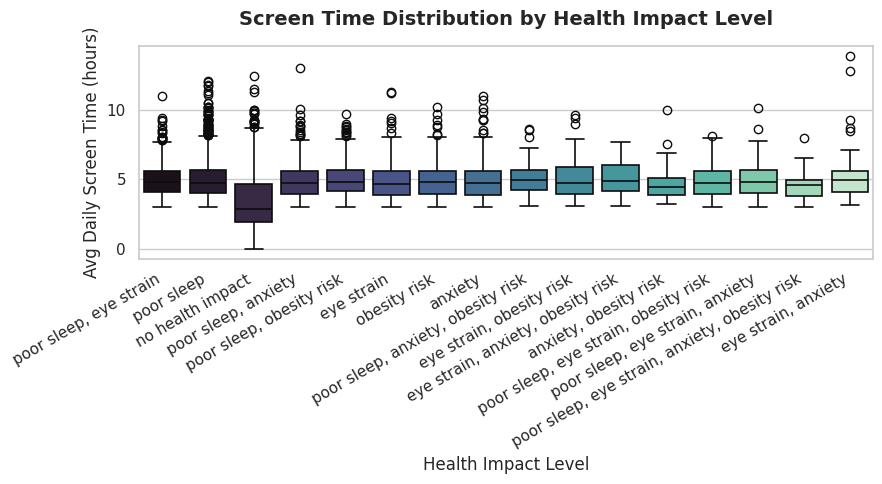

In [14]:
# 3 . Health Impact Patterns by Screen Time
plt.figure(figsize=(9, 5))
sns.set(style="whitegrid")

# Boxplot
sns.boxplot(
    data=df,
    x='Health_Impacts',
    y='Avg_Daily_Screen_Time_hr',
    palette='mako',
    linewidth=1.2
)

# Title and labels
plt.title("Screen Time Distribution by Health Impact Level", fontsize=14, weight='bold', pad=15)
plt.xlabel("Health Impact Level", fontsize=12)
plt.ylabel("Avg Daily Screen Time (hours)", fontsize=12)

#  Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=30, ha='right', fontsize=11)

# Adjust layout to fit labels
plt.tight_layout()
plt.show()


The box height shows how screen time varies within that health impact level.

The middle line inside each box is the median screen time.

Dots outside the boxes (if any) represent outliers—users who spend unusually high or low screen time

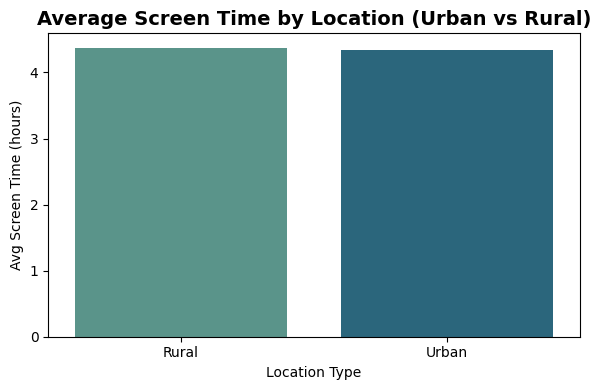

In [8]:
# --- 4. Location-based Habit Comparison ---
habit_location = (
    df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr']
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=habit_location, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', palette='crest')
plt.title("Average Screen Time by Location (Urban vs Rural)", fontsize=14, weight='bold')
plt.xlabel("Location Type")
plt.ylabel("Avg Screen Time (hours)")
plt.tight_layout()
plt.show()

Urban users often show higher average screen time due to better connectivity and work/school requirements.

Rural users might show lower screen exposure, possibly due to lifestyle and access.

In [9]:
# --- 5. Segment Summary Table ---
segment_summary = df.groupby(['Age_Band', 'Urban_or_Rural'])[
    ['Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
].mean().reset_index()

print("\nSegment-wise Habit Summary:")
print(segment_summary.round(2))


Segment-wise Habit Summary:
     Age_Band Urban_or_Rural  Avg_Daily_Screen_Time_hr  \
0  Late teens          Rural                      4.52   
1  Late teens          Urban                      4.53   
2   Pre-teens          Rural                      4.21   
3   Pre-teens          Urban                      4.14   
4   Teenagers          Rural                      4.51   
5   Teenagers          Urban                      4.50   

   Educational_to_Recreational_Ratio  
0                               0.40  
1                               0.40  
2                               0.46  
3                               0.46  
4                               0.40  
5                               0.40  


This helps identify which segments (e.g., Urban Teens, Rural Adults) are most screen-active or balanced in usage.

Habit Patterns: Younger and urban users have higher screen exposure, showing strong digital dependency.

Educational vs Recreational: Educational usage tends to drop when recreational screen time rises.

Health Impacts: Longer screen hours directly link to more severe reported health issues.

Segment Drivers: Device type, age, and location strongly influence user habits